In [129]:
# %pip install pandas
# %pip install scanpy
# %pip install squidpy
# %pip install plotly

In [130]:
import pandas as pd
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
from anndata import AnnData
import sys
from SpatialCell.plot import stack_plot
import random
random.seed(42)
sys.path.append('SpatialCell/SpatialCell')
import SpatialCell.tool as spct
import SpatialCell.plot as spcp
#import squidpy as sq

In [131]:
from matplotlib.pyplot import rc_context
import seaborn as sns
sc.set_figure_params(dpi=100, color_map="viridis_r")
sc.settings.verbosity = 0
sc.logging.print_header()

scanpy==1.9.8 anndata==0.9.2 umap==0.5.7 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.8 pynndescent==0.5.13


In [132]:
import SpatialCell.tool.neighborhood as spn

In [158]:
import importlib
importlib.reload(spct) 
importlib.reload(spn) 

<module 'SpatialCell.tool.neighborhood' from 'f:\\HLL\\SpatialCell\\SpatialCell\\tool\\neighborhood.py'>

In [134]:
adata = sc.read_h5ad('./data/codex_mouse_spleen.h5ad')

In [135]:
adata.raw = adata.copy()
for sample in adata.obs['sample'].cat.categories:
    adata.X[adata.obs['sample'] == sample, :] = sc.pp.scale(adata[adata.obs['sample'] == sample], copy=True).X
adata.layers["scaled"] = sc.pp.scale(adata, copy=True).X

In [136]:
sc.tl.pca(adata)

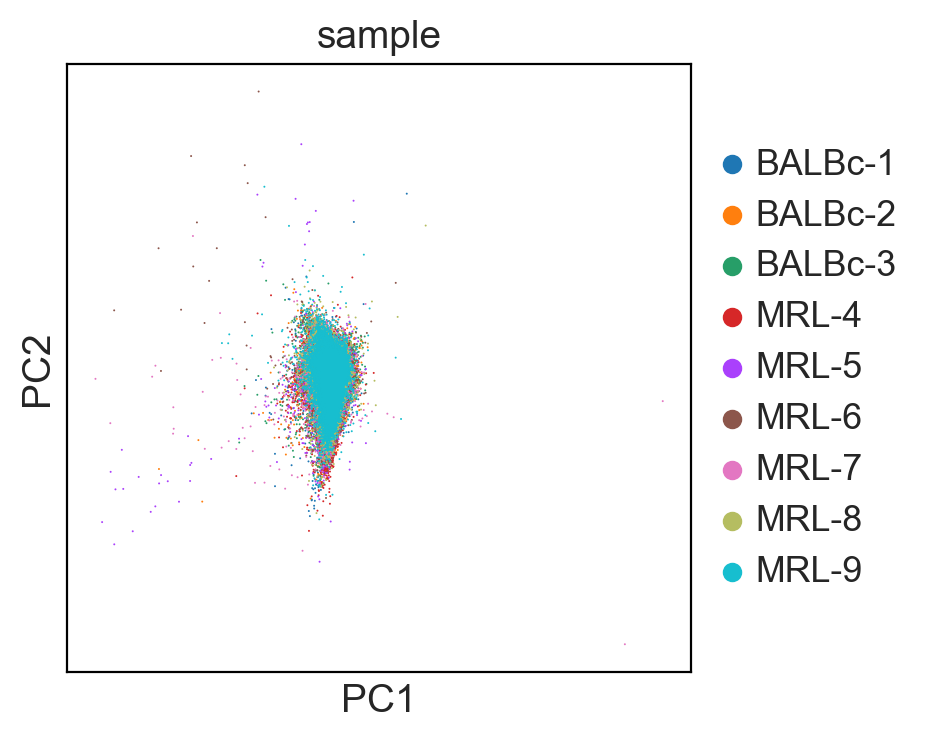

In [137]:
sc.pl.pca(
    adata,
    color=["sample"],
    size=2,
)

In [138]:
subset = adata[adata.obs['sample'] == 'BALBc-1']
pos = subset.obsm['spatial']
labels = subset.obs['cell_type']
result,_ = spn.compute_neighborhood_stats(pos, labels)

Using radius of 8592.609509589698


In [139]:
result['cell_type'] = list(labels)

In [140]:
sp = pd.DataFrame(subset.obsm['spatial'],columns=['x','y'] , index = subset.obs_names)
sp['cell_type'] = subset.obs['cell_type']   

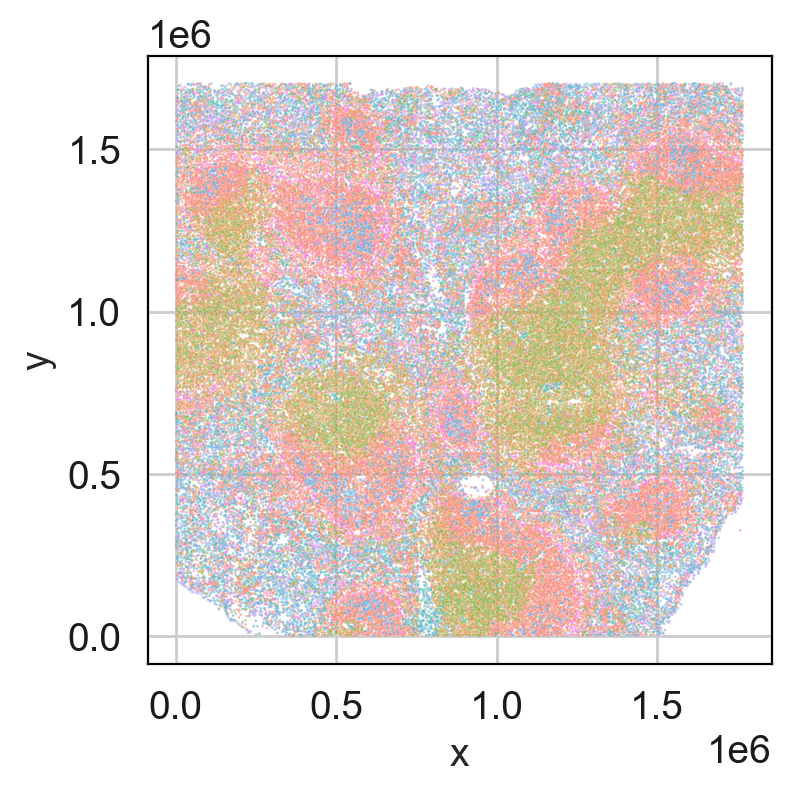

In [141]:
import matplotlib.pyplot as plt
sns.scatterplot(data=sp, x='x', y='y',
                hue ='cell_type' , s = 1, alpha = 0.5 )
plt.legend()
plt.gca().get_legend().set_visible(False)

In [142]:
fig_df = result.groupby('cell_type').mean().reset_index()
fig_df.index = fig_df['cell_type']
fig_df = fig_df.drop('cell_type', axis=1)
fig_df = fig_df.div(fig_df.sum(axis=1), axis=0)

In [143]:
import numpy as np
from scipy.stats import zscore
for i in range(fig_df.shape[1]):
    fig_df.iloc[i,:] = zscore(fig_df.iloc[i,:])
fig_df[np.isinf(fig_df)] = 0

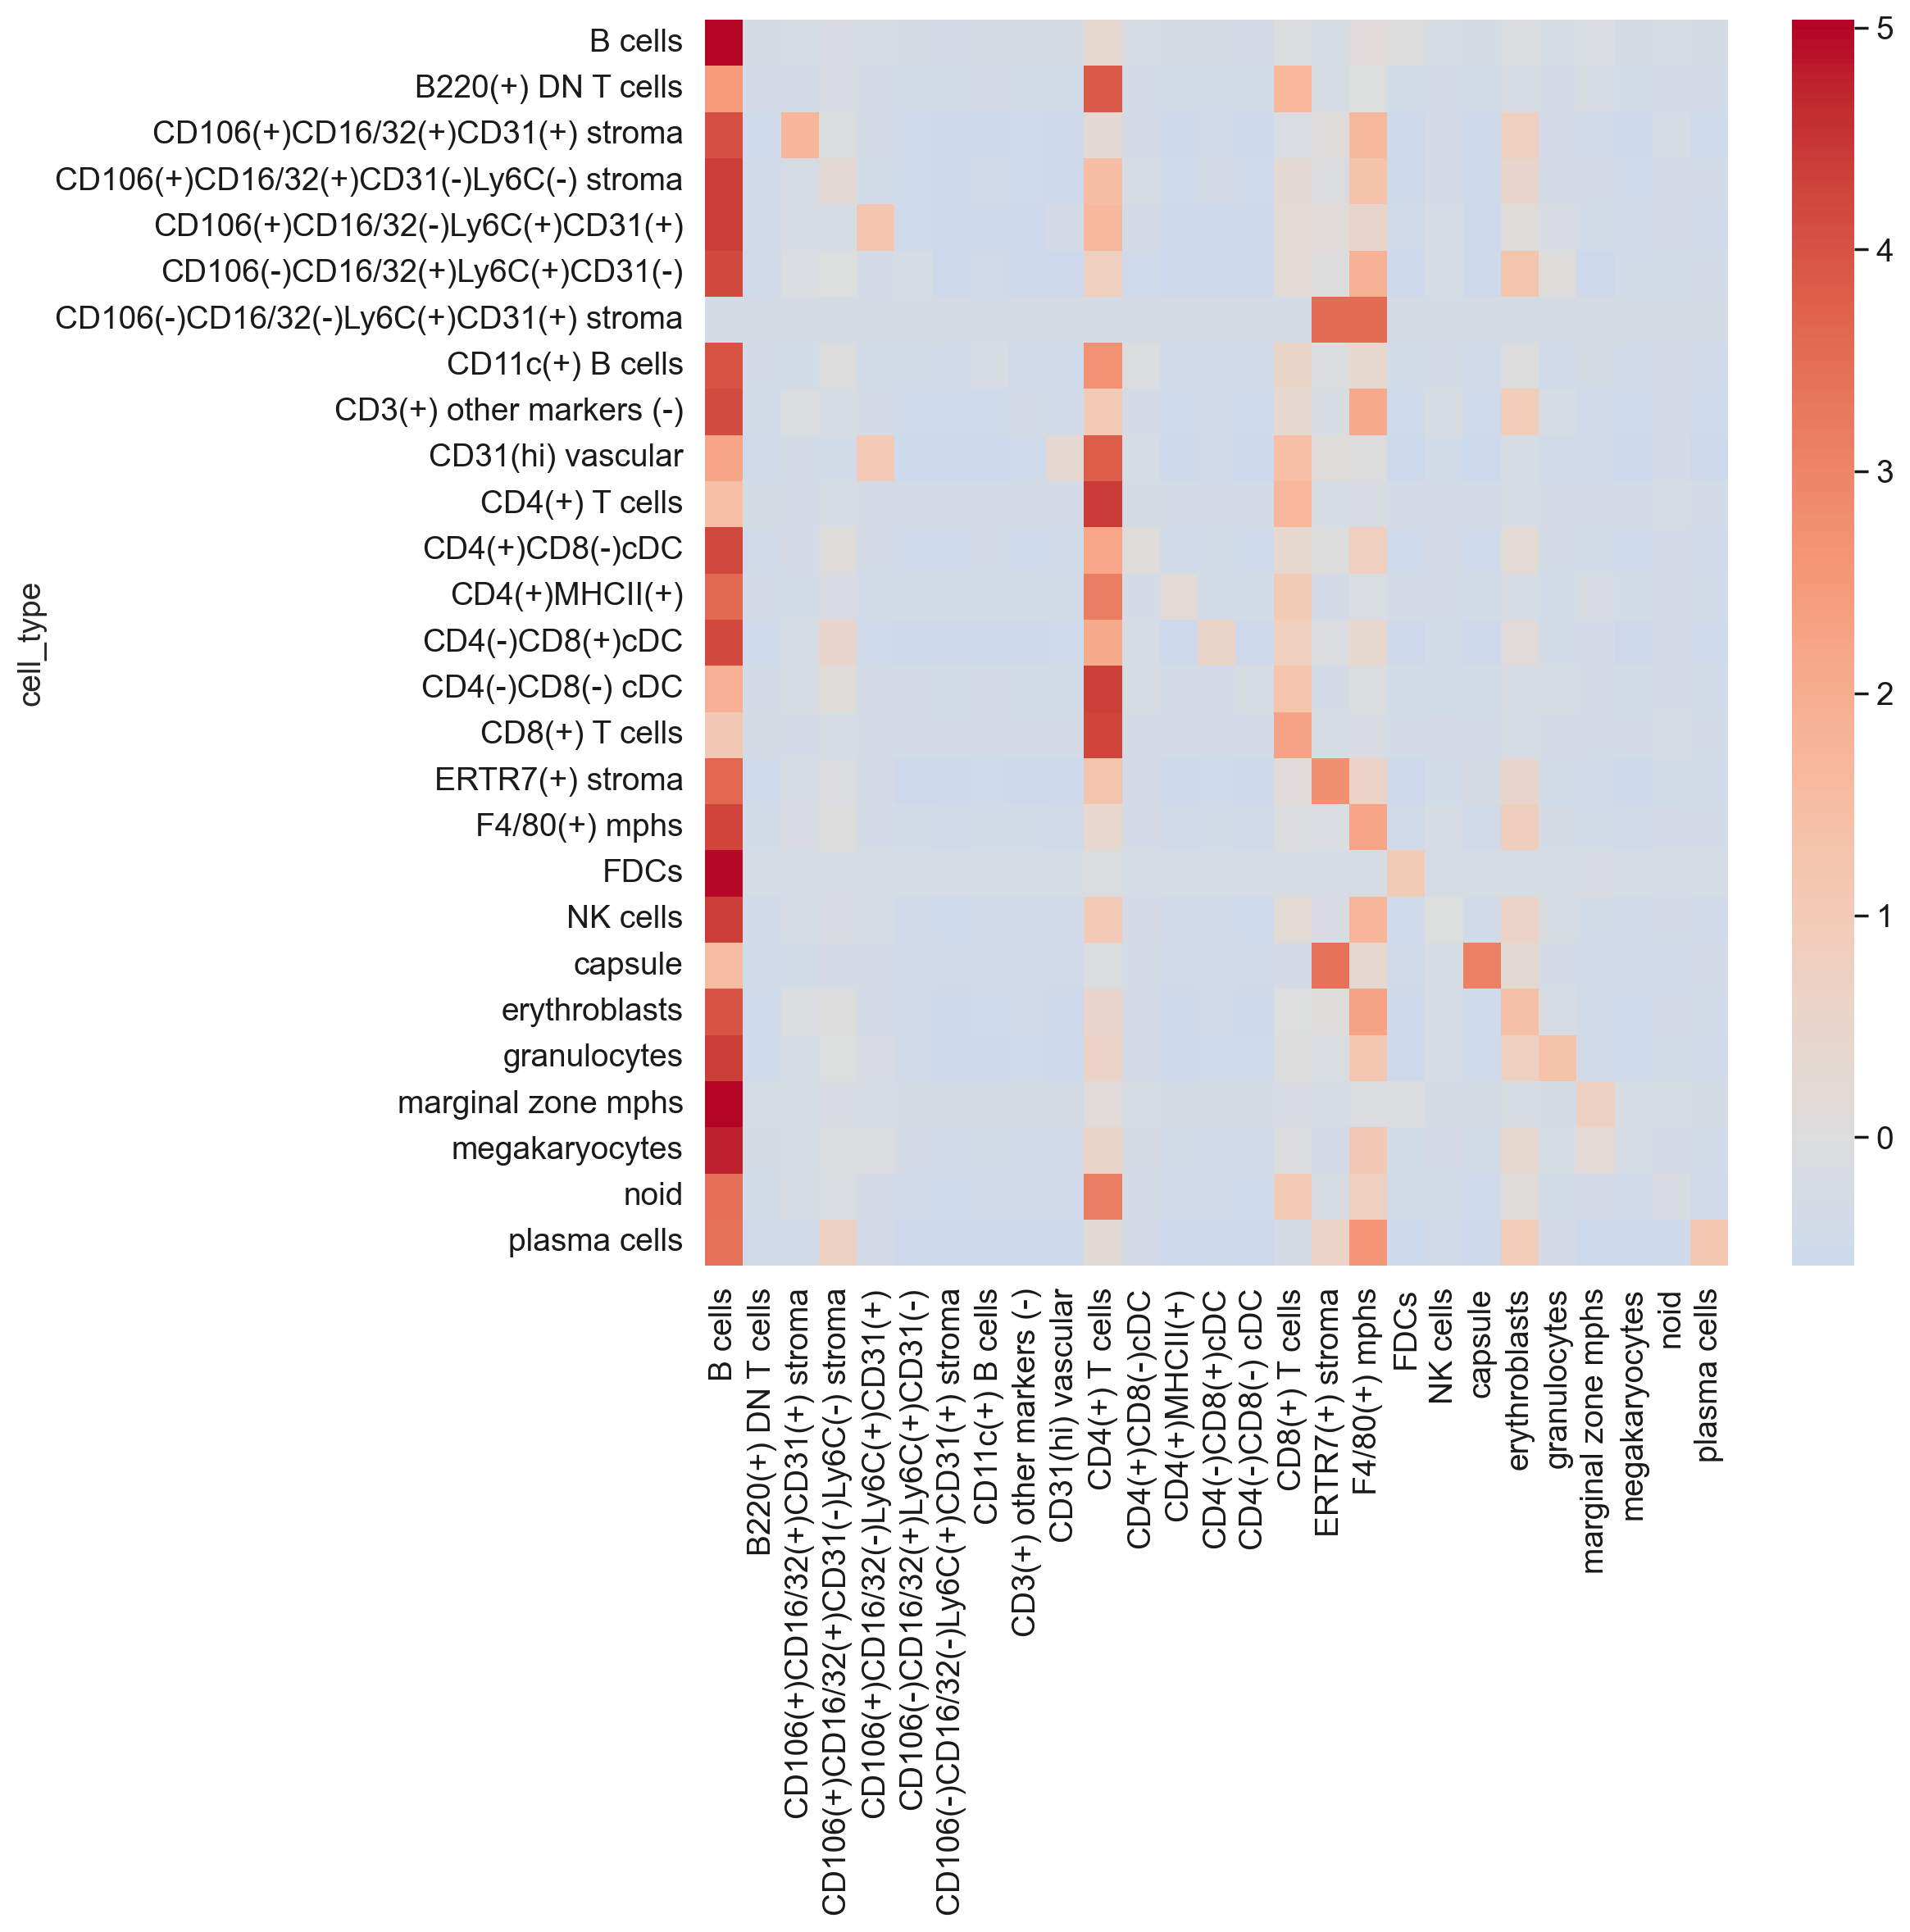

In [144]:
with rc_context({"figure.figsize": (10, 10)}):
    sns.heatmap(data=fig_df , cmap = 'coolwarm' , center = 0)

In [145]:
raw = adata.copy()

In [ ]:
adata = raw.copy()

In [ ]:
spn.neighborhood(adata,'sample')

(<Figure size 1000x800 with 2 Axes>,
 <Axes: xlabel='cell_type', ylabel='center_cell'>)

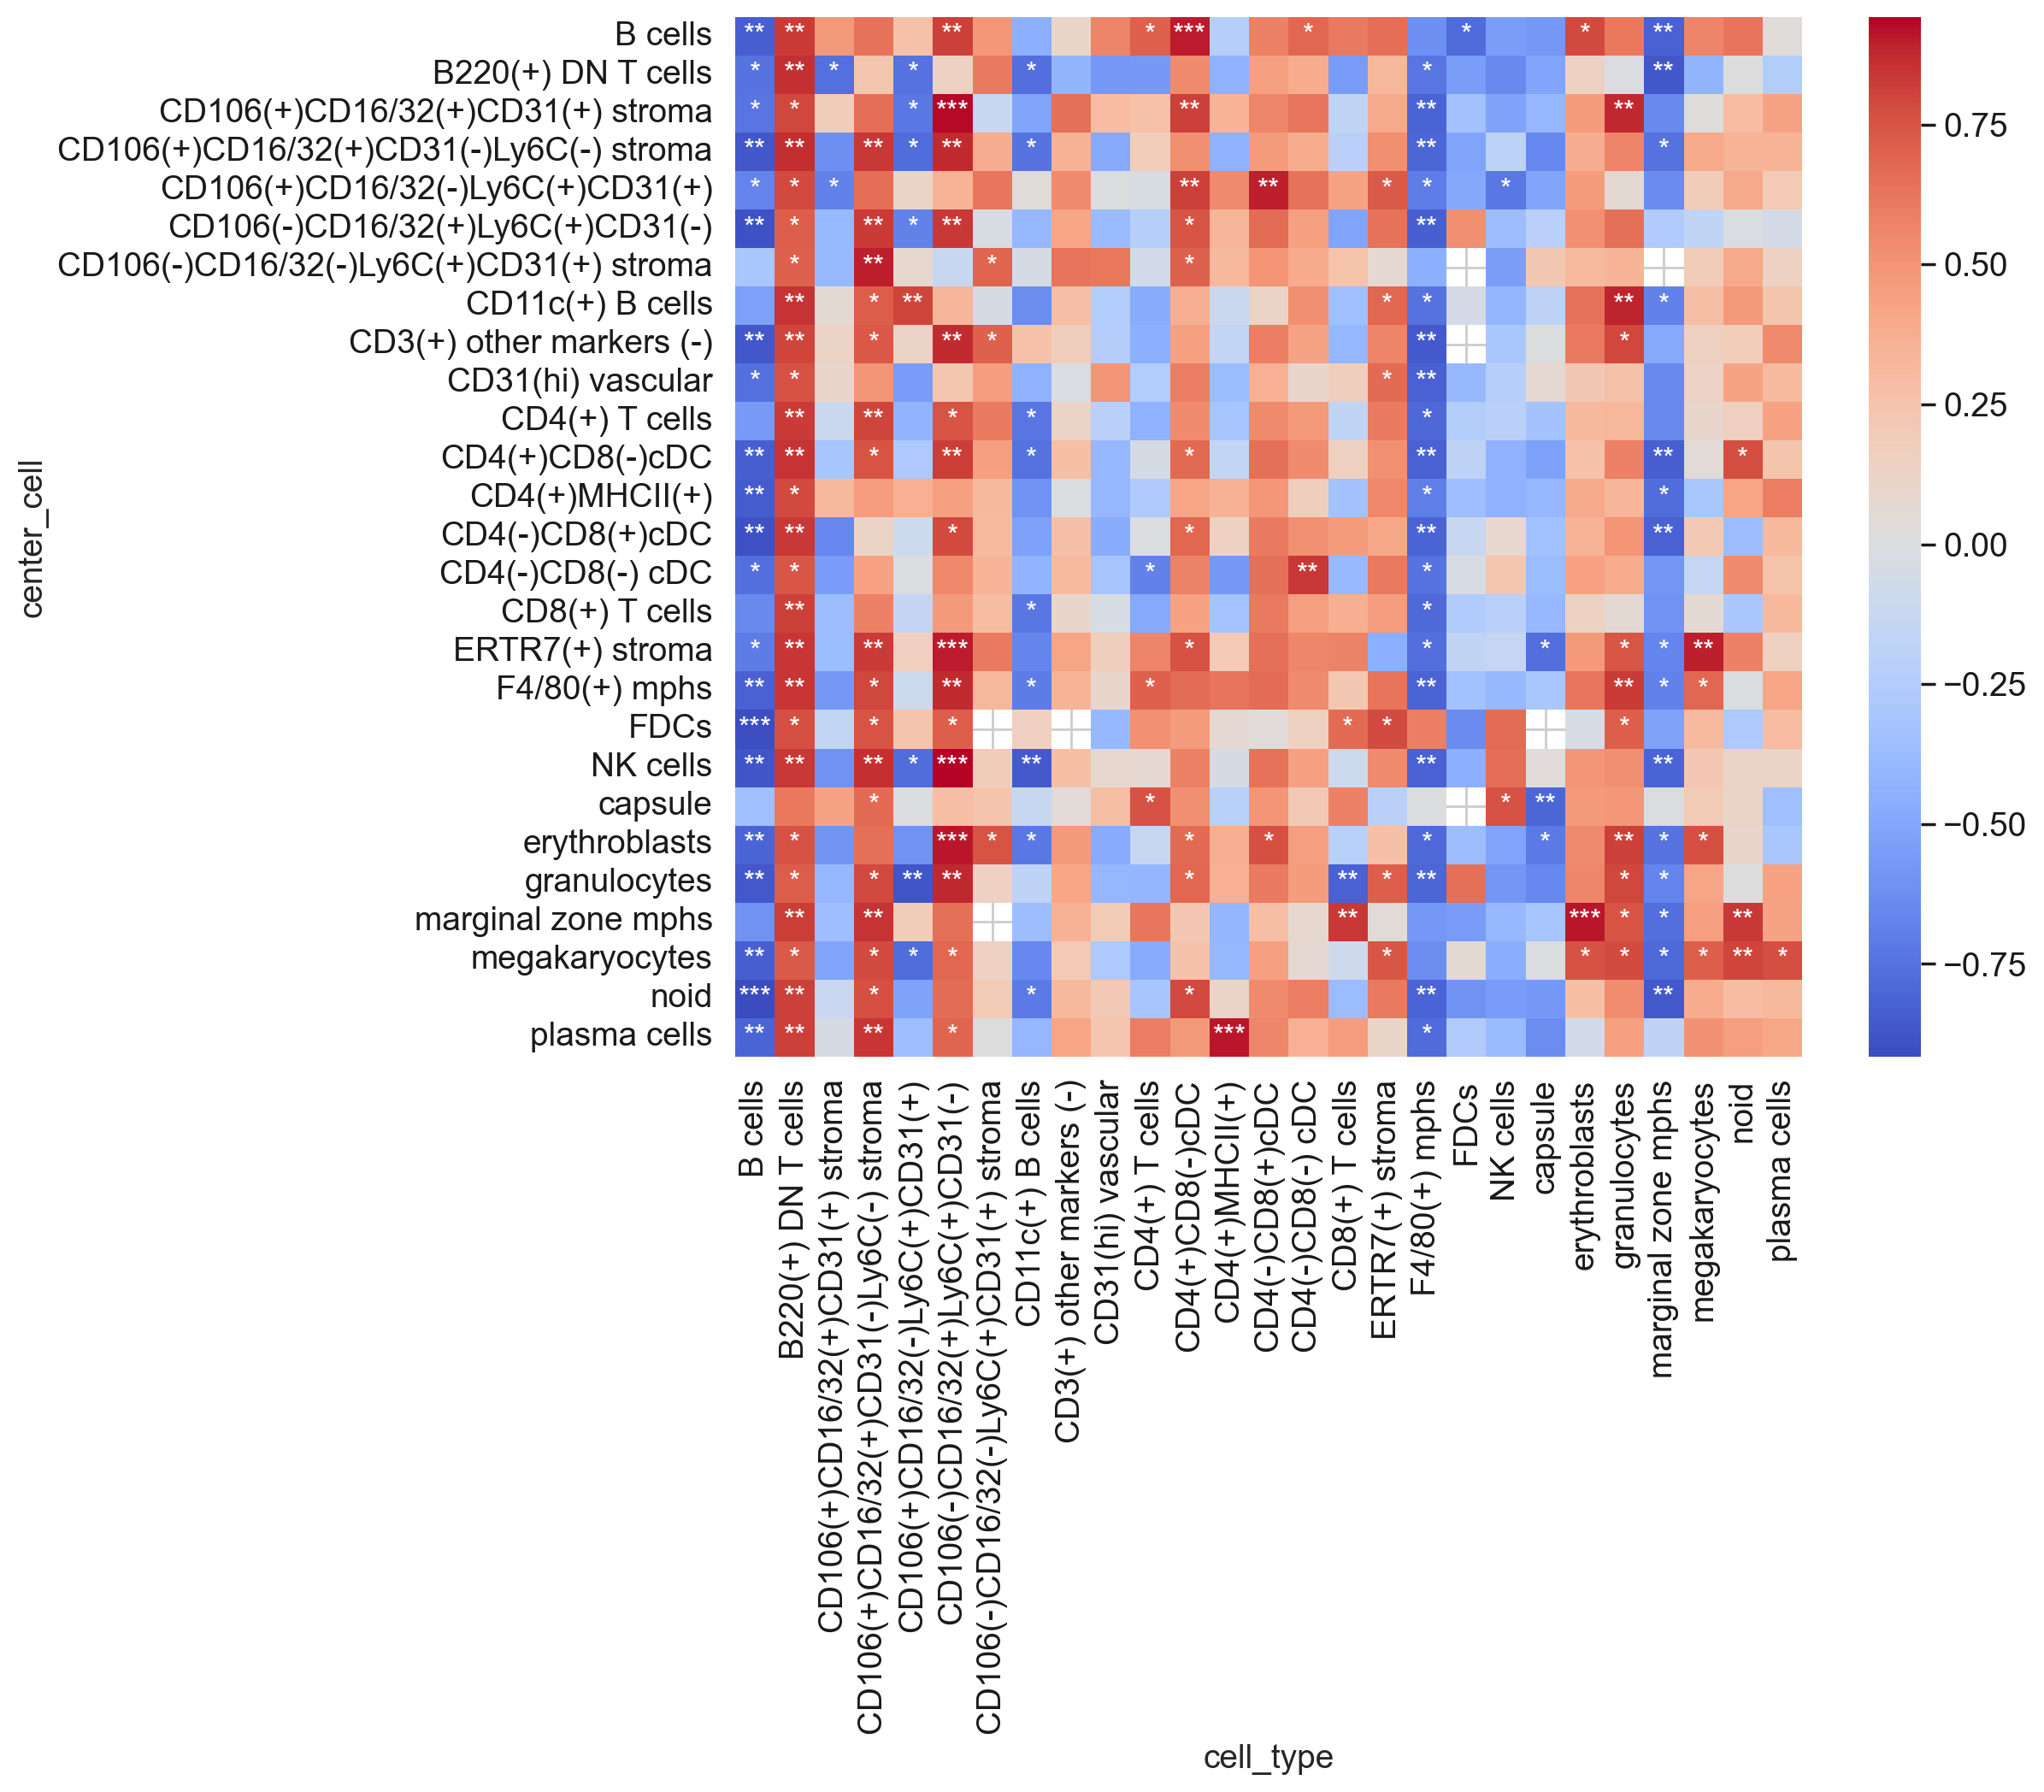

In [159]:
order_stage = {'BALBc' : 0 , 'early MRL' : 1 , 'intermediate MRL':2, 'late MRL' : 3}
spn.corr_pl(adata , order_stage,)

In [170]:
fig_df = pd.DataFrame(adata.obsm['nbor_counts'] , index = adata.obs_names , columns = adata.uns['nbor_label'])
fig_df[['cell_type' , 'stage' ,'sample']] = adata.obs[['cell_type' , 'stage' ,'sample']]

In [169]:
adata.uns.keys()

dict_keys(['spatial', 'spatial_cluster_colors', 'pca', 'sample_colors', 'encorder', 'nbor_label', 'stage_corr_nborh'])

In [171]:
fig_df

,B cells,B220(+) DN T cells,CD106(+)CD16/32(+)CD31(+) stroma,CD106(+)CD16/32(+)CD31(-)Ly6C(-) stroma,CD106(+)CD16/32(-)Ly6C(+)CD31(+),CD106(-)CD16/32(+)Ly6C(+)CD31(-),CD106(-)CD16/32(-)Ly6C(+)CD31(+) stroma,CD11c(+) B cells,CD3(+) other markers (-),CD31(hi) vascular,...,capsule,erythroblasts,granulocytes,marginal zone mphs,megakaryocytes,noid,plasma cells,cell_type,stage,sample
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD11c(+) B cells,BALBc,BALBc-1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,CD11c(+) B cells,BALBc,BALBc-1
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CD11c(+) B cells,BALBc,BALBc-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD11c(+) B cells,BALBc,BALBc-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD11c(+) B cells,BALBc,BALBc-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79343-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CD4(+)MHCII(+),late MRL,MRL-9
79344-4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD4(+)MHCII(+),late MRL,MRL-9
79345-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CD4(+)MHCII(+),late MRL,MRL-9
79346-4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,CD4(+)MHCII(+),late MRL,MRL-9
